**Question 8 -** Using the data from **Question 5**, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season

In [1]:
#importing required libs
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#download and extract data from the link and save it in the data frame for further analysis
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

response = requests.get(url)
data = response.json()

# Extract the data
show_name = data["name"]
episodes = data["_embedded"]["episodes"]

#save in dataframe
dfs = []

# Extract and format data for each episode
for episode in episodes:
    episode_id = episode["id"]
    episode_url = episode["url"]
    episode_name = episode["name"]
    season_number = episode["season"]
    episode_number = episode["number"]
    episode_type = episode["type"]
    airdate = episode["airdate"]
    airtime = episode["airtime"]
    runtime = episode["runtime"]
    average_rating = episode["rating"]["average"]
    summary = episode["summary"]
    medium_image_link = episode["image"]["medium"]
    original_image_link = episode["image"]["original"]
    
    # Remove HTML tags from the summary
    summary = summary.replace("<p>", "").replace("</p>", "")
    
    # Create a dataframe for the current episode
    df = pd.DataFrame({
        "id": [episode_id],
        "url": [episode_url],
        "episode_name": [episode_name],
        "season": [season_number],
        "episode_number": [episode_number],
        "type": [episode_type],
        "airdate": [airdate],
        "airtime": [airtime],
        "runtime": [runtime],
        "average rating": [average_rating],
        "summary": [summary],
        "medium image link": [medium_image_link],
        "original image link": [original_image_link]
    })
    
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(dfs, ignore_index=True)

In [3]:
df.head()

,id,url,episode_name,season,episode_number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


**Insights**

**Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.**

In [4]:
#Get how many seasons are there 
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [5]:
#calculate overall rating for each season
df1 = df[df["season"] == 1]
overall_rating_season1 = df1["average rating"].sum() / len(df1)
print(f"Season 1 has an overall rating of {round(overall_rating_season1, 2)}")

df2 = df[df["season"] == 2]
overall_rating_season2 = df2["average rating"].sum() / len(df2)
print(f"Season 2 has an overall rating of {round(overall_rating_season2, 2)}")

df3 = df[df["season"] == 3]
overall_rating_season3 = df3["average rating"].sum() / len(df3)
print(f"Season 3 has an overall rating of {round(overall_rating_season3, 2)}")

df4 = df[df["season"] == 4]
overall_rating_season4 = df4["average rating"].sum() / len(df4)
print(f"Season 4 has an overall rating of {round(overall_rating_season4, 2)}")

Season 1 has an overall rating of 8.09
Season 2 has an overall rating of 8.0
Season 3 has an overall rating of 7.78
Season 4 has an overall rating of 7.54


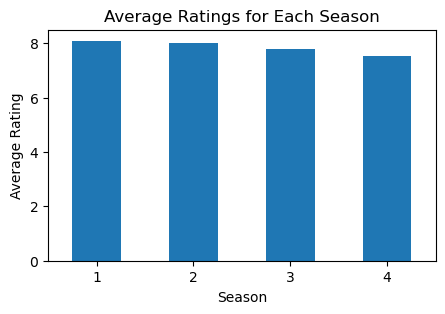

In [6]:
# Group the data by season and calculate the average rating for each season
season_ratings = df.groupby('season')['average rating'].mean()

# Create a bar plot to compare the ratings across seasons
plt.figure(figsize=(5,3))  # Adjust the figure size as per your preference
season_ratings.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.xticks(rotation=0)
plt.show()

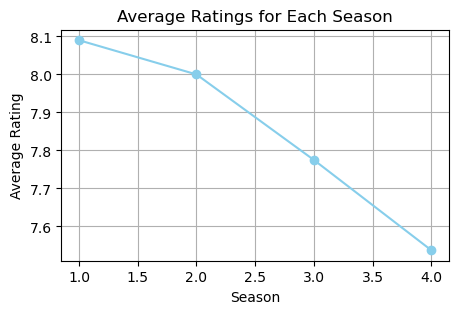

In [7]:
plt.figure(figsize=(5, 3))
season_ratings.plot(marker='o', linestyle='-', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.grid(True)
plt.show()

**Get all the episode names, whose average rating is more than 8 for every season**

In [8]:
# Filter the dataframe to include episodes with average rating > 8 for each season
filtered_df = df[df['average rating'] > 8]

# Group the filtered dataframe by season and aggregate the episode names
episode_names = filtered_df.groupby('season')['episode_name'].apply(list)

# Display the episode names for each season
for season, episodes in episode_names.items():
    print(f"Season {season} episodes with average rating > 8:")
    for episode in episodes:
        print(episode)
    print()

Season 1 episodes with average rating > 8:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2 episodes with average rating > 8:
Kiksuya
Vanishing Point
The Passenger



In [9]:
print(f"no of episodes whose average rating is more than 8 in every season are: {len(filtered_df)}")

no of episodes whose average rating is more than 8 in every season are: 6


**Get all the episode names that aired before May 2019**

In [10]:
#convert the airdate column to datetime format
df["airdate"] = pd.to_datetime(df["airdate"])

#filter the data to find episodes aired before May 2019
filtered_df = df[df["airdate"] < pd.Timestamp('2019-05-01')]

# Retrieve the episode names
episode_names = filtered_df['episode_name'].tolist()

# Display the episode names
for episode in episode_names:
    print(episode)

The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


**Get the episode name from each season with the highest and lowest rating**

In [11]:
# Group the dataframe by season and find the episode with the highest rating in each season
highest_ratings = df.groupby('season')['average rating'].idxmax()
highest_episodes = df.loc[highest_ratings, ['season', 'episode_name', 'episode_number']]

# Group the dataframe by season and find the episode with the lowest rating in each season
lowest_ratings = df.groupby('season')['average rating'].idxmin()
lowest_episodes = df.loc[lowest_ratings, ['season', 'episode_name', 'episode_number']]

# Display the episode names with the highest and lowest ratings for each season
for season in df['season'].unique():
    highest_rating_episode = highest_episodes[highest_episodes['season'] == season]
    lowest_rating_episode = lowest_episodes[lowest_episodes['season'] == season]

    print(f"Season {season}:")
    print(f"Highest Rating Episode: {highest_rating_episode['episode_number'].values[0]} - {highest_rating_episode['episode_name'].values[0]}")
    print(f"Lowest Rating Episode: {lowest_rating_episode['episode_number'].values[0]} - {lowest_rating_episode['episode_name'].values[0]}")
    print()

Season 1:
Highest Rating Episode: 10 - The Bicameral Mind
Lowest Rating Episode: 3 - The Stray

Season 2:
Highest Rating Episode: 8 - Kiksuya
Lowest Rating Episode: 5 - Akane No Mai

Season 3:
Highest Rating Episode: 1 - Parce Domine
Lowest Rating Episode: 6 - Decoherence

Season 4:
Highest Rating Episode: 5 - Zhuangzi
Lowest Rating Episode: 1 - The Auguries



**Get the summary for the most popular ( ratings ) episode in every season**

In [12]:
# Retrieve the summaries for the most popular episode in each season
episode_summaries = df.loc[highest_ratings, ['season', 'episode_number', 'episode_name', 'summary']]

# Display the summaries for the most popular episode in each season
for index, row in episode_summaries.iterrows():
    season = row['season']
    episode_number = row['episode_number']
    episode_name = row['episode_name']
    summary = row['summary']

    print(f"Season {season} - Episode {episode_number}: {episode_name}")
    print(f"Summary: {summary}")
    print()

Season 1 - Episode 10: The Bicameral Mind
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2 - Episode 8: Kiksuya
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3 - Episode 1: Parce Domine
Summary: If you're stuck in a loop, try walking in a straight line.

Season 4 - Episode 5: Zhuangzi
Summary: God is bored.

